In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")

> **`DATETIME MODULE`**

In [2]:
# Datetime module

datetime.datetime(2021, 1, 1)

datetime.datetime(2021, 1, 1, 0, 0)

Above command creates a date for 1st Jan 2021. It's output is of the format `years, months, day, hours, minutes`. Also the 0's in output represents hours and minutes. We can use this datetime module to create dates in different formats. Let us explore further.

In [3]:
# Datetime in specific format 

datetime.datetime.strptime("2021/01/12", "%Y/%m/%d")

datetime.datetime(2021, 1, 12, 0, 0)

**`NOTE`**: `strptime` converts string into datetime object 

In [4]:
# Representing date in different format

datetime.datetime(2021, 1, 12, 0, 0).strftime("%d.%m.%Y")

'12.01.2021'

**`NOTE`**: `strftime` converts datetime object into string

> **`PANDAS DATETIME`**

In [5]:
# Using pandas function

pd.to_datetime("2020.01.12", format="%Y.%m.%d")

Timestamp('2020-01-12 00:00:00')

<br>

> **`PANDAS TIMESTAMP OBJECT`**

In [6]:
# Getting the proper date format from the time given in seconds.

time_stamp = pd.to_datetime(946684800000000000)
time_stamp

Timestamp('2000-01-01 00:00:00')

In [7]:
# Extracting year, month, day, weekday 

time_stamp.year, time_stamp.month, time_stamp.day, time_stamp.weekday()

(2000, 1, 1, 5)

Timestamp objects are an important part of time series capabilities of pandas, since timestamps are the building block of DateTimeIndex objects:

In [8]:
index = [pd.Timestamp("2021-01-01"),
         pd.Timestamp("2021-01-02"),
         pd.Timestamp("2021-01-03")]

ts = pd.Series(np.random.rand(len(index)), index=index)
ts

2021-01-01    0.944163
2021-01-02    0.826565
2021-01-03    0.394817
dtype: float64

In [9]:
ts.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq=None)

**`NOTE`**: We created a list of timestamp objects and pass it to the series constructor as index. This list of timestamps gets converted into a DatetimeIndex on the fly. If we had passed only the date strings, we would not get a DatetimeIndex, just an index:

In [10]:
ts = pd.Series(np.random.rand(len(index)), index=["2000-01-01", "2000-01-02", "2000-01-03"])
ts

2000-01-01    0.785818
2000-01-02    0.819106
2000-01-03    0.526410
dtype: float64

In [11]:
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

However, the to_datetime function is flexible enough to be of help, if all we have is a list of date strings:

In [12]:
index = pd.to_datetime(['2000-01-01', '2000-01-02', '2000-01-03'])
ts = pd.Series(np.random.rand(len(index)), index = index)
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

<br>

> **`SEQUENCE OF TIMESTAMPS`**


Sometimes we are not explicitly given all the information about a series and we have to generate sequences of time stamps of fixed intervals ourselves. Pandas offer another great utility function for this task: `date_range`.

The `date_range` function helps to generate a fixed frequency datetime index between start and end dates. It is also possible to specify either the start or end date and the number of timestamps to generate.

The frequency can be specified by the freq parameter, which supports a number of offsets. You can use typical time intervals like hours, minutes, and seconds:

In [13]:
# Frequency - Hours

pd.date_range(start="2021-01-01", periods=3, freq='H')

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [14]:
# Frequency - Minutes

pd.date_range(start="2021-01-01", periods=3, freq='T')

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:01:00',
               '2021-01-01 00:02:00'],
              dtype='datetime64[ns]', freq='T')

In [15]:
# Frequency - Seconds

pd.date_range(start="2021-01-01", periods=3, freq='S')

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:00:01',
               '2021-01-01 00:00:02'],
              dtype='datetime64[ns]', freq='S')

In [16]:
# Frequency - Business Days of millenium

pd.date_range(start="2021-01-01", periods=3, freq='B')

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05'], dtype='datetime64[ns]', freq='B')

In [17]:
# Frequency - MonthEnd 

pd.date_range(start="2021-01-01", periods=3, freq='M')

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31'], dtype='datetime64[ns]', freq='M')

The table at the link shows the available offset aliases and can be also be looked up in the Pandas documentation on time series under https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

We can also use the combination of offset to represent the datetime.

In [18]:
# Custom Frequency

pd.date_range(start='2020-01-01', periods=3, freq='1D1h1min10s')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-02 01:01:10',
               '2020-01-03 02:02:20'],
              dtype='datetime64[ns]', freq='90070S')

In [19]:
# Frequency - Weekday(Friday)

pd.date_range(start='2021-06-01', periods=5, freq='W-Fri')

DatetimeIndex(['2021-06-04', '2021-06-11', '2021-06-18', '2021-06-25',
               '2021-07-02'],
              dtype='datetime64[ns]', freq='W-FRI')

Finally, we can merge various indexes of different frequencies. The possibilities are endless.

In [20]:
# Frequency - Business Year End 

s = pd.date_range(start="2021-01-01", periods=12, freq='BAS')
s

DatetimeIndex(['2021-01-01', '2022-01-03', '2023-01-02', '2024-01-01',
               '2025-01-01', '2026-01-01', '2027-01-01', '2028-01-03',
               '2029-01-01', '2030-01-01', '2031-01-01', '2032-01-01'],
              dtype='datetime64[ns]', freq='BAS-JAN')

In [21]:
# Frequency - Year End 

e = pd.date_range(start="2021-01-01", periods=12, freq='A')
e

DatetimeIndex(['2021-12-31', '2022-12-31', '2023-12-31', '2024-12-31',
               '2025-12-31', '2026-12-31', '2027-12-31', '2028-12-31',
               '2029-12-31', '2030-12-31', '2031-12-31', '2032-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [22]:
# Frequency - BYearBegin union YearEnd

s = pd.date_range(start="2021-01-01", periods=10, freq='BAS-JAN')
t = pd.date_range(start="2021-01-01", periods=10, freq='A-FEB')
s.union(t)

DatetimeIndex(['2021-01-01', '2021-02-28', '2022-01-03', '2022-02-28',
               '2023-01-02', '2023-02-28', '2024-01-01', '2024-02-29',
               '2025-01-01', '2025-02-28', '2026-01-01', '2026-02-28',
               '2027-01-01', '2027-02-28', '2028-01-03', '2028-02-29',
               '2029-01-01', '2029-02-28', '2030-01-01', '2030-02-28'],
              dtype='datetime64[ns]', freq=None)

<br>

> **`PLOTTING & SLICING TIMESERIES`**

We have seen two powerful functions so far, `to_datetime and date_range`. Now we want to dive into time series by first showing how you can create and plot time series data with only a few lines. In the rest of this section, we will show various ways to access and slice time series data.

<AxesSubplot:>

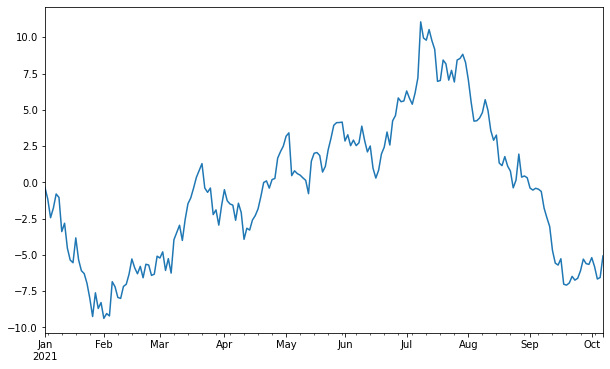

In [23]:
plt.figure(figsize = (10, 6))
index = pd.date_range(start = '2021-01-01', periods=200, freq='B')
time_series = pd.Series(data = np.random.randn(len(index)), index = index)
time_series.head()
walk = time_series.cumsum()
walk.plot()

In [24]:
# To check few records from time series.

time_series.head()

2021-01-01   -0.351871
2021-01-04   -0.796689
2021-01-05   -1.287452
2021-01-06    0.664099
2021-01-07    0.971721
Freq: B, dtype: float64

In [25]:
time_series[0]

-0.3518710641509198

**`NOTE`**: We can use date string as keys, even though our time series is of type DatetimeIndex.

In [26]:
time_series['2021-01-01']

-0.3518710641509198

**`NOTE`**: We can use datetime object as keys as well

In [27]:
time_series[datetime.datetime(2021, 1, 1)]

-0.3518710641509198

**`NOTE`**: We can use slicing operation to extract more than one values

In [28]:
time_series['2021-01-01':'2021-01-10']

2021-01-01   -0.351871
2021-01-04   -0.796689
2021-01-05   -1.287452
2021-01-06    0.664099
2021-01-07    0.971721
2021-01-08   -0.238907
Freq: B, dtype: float64

In [29]:
time_series['2021-01-01':datetime.datetime(2021, 1, 10)]

2021-01-01   -0.351871
2021-01-04   -0.796689
2021-01-05   -1.287452
2021-01-06    0.664099
2021-01-07    0.971721
2021-01-08   -0.238907
Freq: B, dtype: float64

**`NOTE`**: We can also pass partial entries to select group of entries.

In [30]:
time_series['2021-02']

2021-02-01   -1.089345
2021-02-02    0.331950
2021-02-03   -0.163069
2021-02-04    2.359663
2021-02-05   -0.351500
2021-02-08   -0.737487
2021-02-09   -0.063152
2021-02-10    0.823463
2021-02-11    0.153750
2021-02-12    0.697680
2021-02-15    1.042377
2021-02-16   -0.609726
2021-02-17   -0.410708
2021-02-18    0.512200
2021-02-19   -0.787158
2021-02-22    0.930857
2021-02-23   -0.050967
2021-02-24   -0.717464
2021-02-25    0.085078
2021-02-26    1.240413
Freq: B, dtype: float64

**`NOTE`**: Time series can be shifted forward or backward in time. The index stays in place only the values moves.

In [31]:
# Creating subset from previously created time series

small_ts = time_series['2021-01-01':datetime.datetime(2021, 1, 5)]
small_ts

2021-01-01   -0.351871
2021-01-04   -0.796689
2021-01-05   -1.287452
Freq: B, dtype: float64

In [32]:
small_ts.shift(2)

2021-01-01         NaN
2021-01-04         NaN
2021-01-05   -0.351871
Freq: B, dtype: float64

In [33]:
small_ts.shift(-2)

2021-01-01   -1.287452
2021-01-04         NaN
2021-01-05         NaN
Freq: B, dtype: float64

<br>

> **`RESAMPLING`**

`Q. What is resampling ?`

As we know that timeseries data could be in different frequency. It could be in hours, minutes, seconds, daily, weekly or        even monthly level. Suppose, we have data at hourly level which can be easily aggregated and converted into daily level. So,    this conversion of timeseries from one formt to another is called as **resampling**.

`Q. Why do we need resmapling ?`

Let us say we have captured the data every second or 1/10th of a second which might cause the size of the data to be large so, using resample we can convert this data into seconds, hourly or daily level which will drastically reduce the size of the dataset and most important thing it will reduce the noise in the dataset because data is captured at a small interval tend to have a lot of noise and have spikes so, resampling same data at higher frequency will reduce the noise and make it easier for forecasting.

`Q. What are the types of resampling ?`

- We have two types of sampling - **upsampling** and **downsampling**. Upsampling refers to increasing the frequency of the samples such as from minutes to seconds so, at minute level we will have 60 rows per hour. Downsampling is when we decrease the frequency of the sample such as hourly to a daily level data. 


- Downsampling is easier when compared with Upsampling as we only have to take average or sum to aggregate the values whereas in upsampling we need to interpolation.

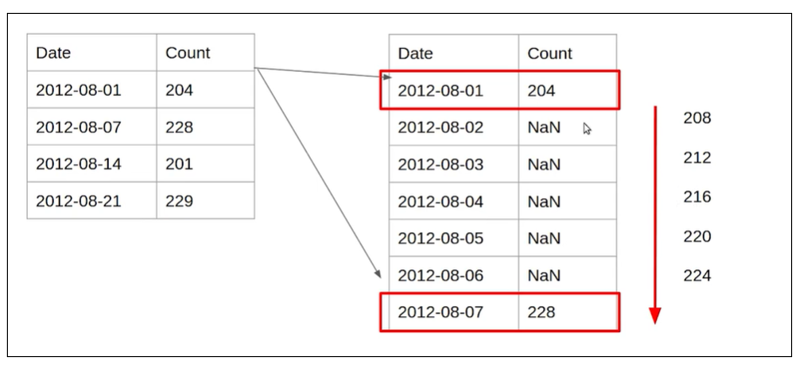

**`UPSAMPLING - INTERPOLATION TECHNIQUE`**

<br>

In [34]:
# Reading the data (We will see we have data at daily level)

train_data = pd.read_csv('train.csv')
train_data.head(3)

,Date,count
0,25-08-2012,3
1,26-08-2012,3
2,27-08-2012,2


In [35]:
# Checking the data type of columns 

train_data.dtypes

Date     object
count     int64
dtype: object

In [36]:
# Setting column as date time index as the dtype of column was object.

train_data = train_data.set_index(pd.to_datetime(train_data['Date']))
train_data.drop('Date', axis=1, inplace=True)
train_data.head(3)

,count
Date,
2012-08-25,3
2012-08-26,3
2012-08-27,2


In [40]:
# Downsampling the data into weekly level.

downsample_data = train_data.resample('W').mean()
downsample_data.head()

,count
Date,
2012-01-15,8.50
2012-01-22,NaN
2012-01-29,NaN
2012-02-05,NaN
2012-02-12,16.75


**`NOTE`**: We have done downsampling from daily to weekly level. The default aggregation is to take all teh values and calculate mean of it.

<AxesSubplot:xlabel='Date'>

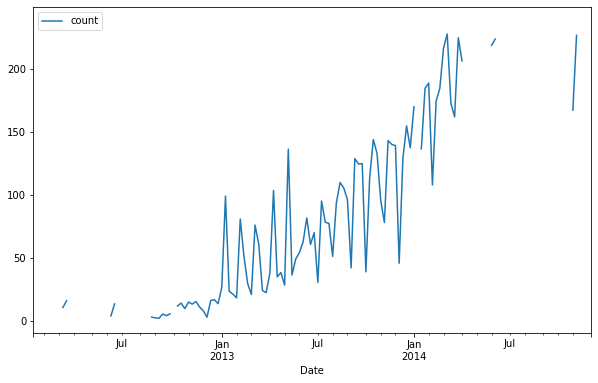

In [41]:
downsample_data.plot()

<AxesSubplot:xlabel='Date'>

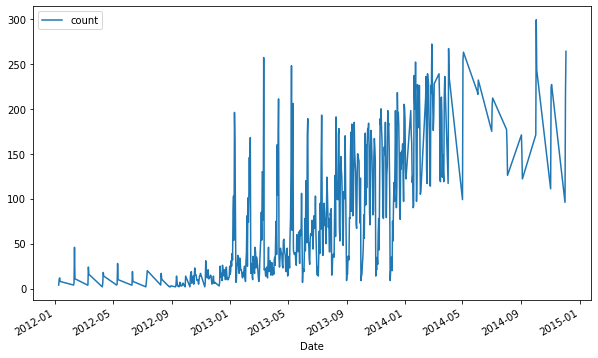

In [39]:
train_data.plot()

In [46]:
# Upsampling the data into hourly level

upsample_data = train_data.resample('H').ffill()
upsample_data.head()

,count
Date,
2012-01-09 00:00:00,4
2012-01-09 01:00:00,4
2012-01-09 02:00:00,4
2012-01-09 03:00:00,4
2012-01-09 04:00:00,4


**`NOTE`**: `pd.DataFrame.ffill()` is used to fill the missing values in dataframe. It will propagate last valid observation forward.

In [49]:
# Using interpolate()

upsample_data_inter = train_data.resample('H').interpolate()
upsample_data_inter.head()

,count
Date,
2012-01-09 00:00:00,4.00
2012-01-09 01:00:00,4.25
2012-01-09 02:00:00,4.50
2012-01-09 03:00:00,4.75
2012-01-09 04:00:00,5.00


<br>

> **`TIMEZONE`**

Here we will see how we can convert the given time series from one timezone to another timezone with the help of Timestamp function of pandas which gives us the flexibility to specify the timezones.

In [53]:
t = pd.Timestamp('2021-06-15')
t

Timestamp('2021-06-15 00:00:00')

In [54]:
# Checking if timezone is there or not

t.tz is None

True

In [52]:
# Working with date_range

rng = pd.date_range('2021-06-01', periods=10, freq='D', tz='America/Los_Angeles')
rng

DatetimeIndex(['2021-06-01 00:00:00-07:00', '2021-06-02 00:00:00-07:00',
               '2021-06-03 00:00:00-07:00', '2021-06-04 00:00:00-07:00',
               '2021-06-05 00:00:00-07:00', '2021-06-06 00:00:00-07:00',
               '2021-06-07 00:00:00-07:00', '2021-06-08 00:00:00-07:00',
               '2021-06-09 00:00:00-07:00', '2021-06-10 00:00:00-07:00'],
              dtype='datetime64[ns, America/Los_Angeles]', freq='D')

**`NOTE`**: Suppose we have a timeseries but without a timezone so we can use `tz_localize()` to assign the timezone to the time series.

In [57]:
index = pd.date_range('2021-06-01', periods=10, freq='D')
time_series = pd.Series(np.random.rand(len(index)), index = index)
time_series.index.tz is None

True

In [59]:
time_series_utc = time_series.tz_localize('UTC')
time_series_utc.index.tz is None

False

In [61]:
time_series_utc.index.tz

<UTC>

**`NOTE`**: To convert the timezone from one form to another we can use `tz_convert`.

In [65]:
time_series_utc.tz_convert('Europe/Berlin').index.tz

<DstTzInfo 'Europe/Berlin' LMT+0:53:00 STD>

In [68]:
# Removing time_zone from the series

time_series_utc.tz_convert(None).index.tz is None 

True

<br>

> **`TIMEDELTA`**

`TIMEDELTA` is basically used to perform basic arithematic calculation with the time series like if we want to know how many days are there between particular days or if we want to add particular time steps.

In [69]:
# Simplest TimeDelta for 1 day

pd.Timedelta('1D')

Timedelta('1 days 00:00:00')

In [104]:
pd.Timedelta('1D 1H 1M 1s')

Timedelta('1 days 01:01:01')

In [76]:
# To calcualte total time if some data is in days or seconds 

pd.Timedelta(days = 1) + pd.Timedelta(seconds = 10)

Timedelta('1 days 00:00:10')

In [98]:
from datetime import datetime

initial_day = datetime.now()

future_days_2_years = initial_day + pd.Timedelta(days = 728)
print("Future 2 years date:", future_days_2_years)

future_days_2_day = initial_day + pd.Timedelta(days = 2)
print("Future 2 days date :", future_days_2_day)

Future 2 years date: 2023-06-13 14:01:11.641400
Future 2 days date : 2021-06-17 14:01:11.641400
